In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv(r'C:\Users\HP\Downloads\PremierLeague.csv')

In [28]:
df

,Season,Date,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,HalfTimeHomeTeamGoals,HalfTimeAwayTeamGoals,HalfTimeResult,Referee,HomeTeamShots,AwayTeamShots,HomeTeamShotsOnTarget,AwayTeamShotsOnTarget,HomeTeamCorners,AwayTeamCorners,HomeTeamFouls,AwayTeamFouls,HomeTeamYellowCards,AwayTeamYellowCards,HomeTeamRedCards,AwayTeamReadCards,B365HomeTeam,B365Draw,B365AwayTeam,B365Over2.5Goals,B365Under2.5Goals,MarketMaxHomeTeam,MarketMaxDraw,MarketMaxAwayTeam,MarketAvgHomeTeam,MarketAvgDraw,MarketAvgAwayTeam,MarketMaxOver2.5Goals,MarketMaxUnder2.5Goals,MarketAvgOver2.5Goals,MarketAvgUnder2.5Goals
0,1993-1994,14/08/93,NaN,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-1994,14/08/93,NaN,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-1994,14/08/93,NaN,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-1994,14/08/93,NaN,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-1994,14/08/93,NaN,Man City,Leeds,1,1,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11678,2023-2024,13/03/24,19:30:00,Bournemouth,Luton,4,3,H,0.0,3.0,A,S Allison,24.0,8.0,10.0,4.0,11.0,3.0,16.0,11.0,1.0,2.0,0.0,0.0,1.50,4.75,5.75,1.44,2.70,1.55,4.98,6.40,1.50,4.77,6.00,1.49,2.82,1.47,2.71
11679,2023-2024,16/03/24,15:00:00,Burnley,Brentford,2,1,H,1.0,0.0,H,D Bond,17.0,9.0,6.0,5.0,5.0,4.0,14.0,17.0,2.0,4.0,0.0,1.0,3.25,3.60,2.15,1.75,2.05,3.41,3.80,2.21,3.27,3.66,2.16,1.80,2.17,1.75,2.10
11680,2023-2024,16/03/24,15:00:00,Luton,Nott'm Forest,1,1,D,0.0,1.0,A,D England,10.0,16.0,4.0,6.0,6.0,7.0,10.0,17.0,1.0,2.0,0.0,0.0,2.80,3.50,2.45,1.67,2.15,2.95,3.80,2.47,2.81,3.63,2.42,1.73,2.31,1.68,2.22
11681,2023-2024,16/03/24,17:30:00,Fulham,Tottenham,3,0,H,1.0,0.0,H,R Jones,16.0,14.0,7.0,5.0,4.0,5.0,9.0,10.0,2.0,3.0,0.0,0.0,3.50,3.80,1.95,1.48,2.60,3.54,4.16,2.08,3.40,3.93,2.01,1.52,2.72,1.49,2.62


# Cleaning The Dataset

In [4]:
df.shape

(11683, 39)

In [5]:
pd.set_option('display.max_columns',None)

In [6]:
pd.set_option('display.max_rows',100)

In [7]:
df.dropna(inplace=True)

In [8]:
df.reset_index(inplace=True,drop=True)

# task 1: comaparing beween total gools scored by liverpool vs man city

In [11]:
c=df[df['HomeTeam']=='Liverpool'].groupby('HomeTeam',as_index=False).sum('FullTimeHomeTeamGoals')

In [12]:
hg=c.iloc[:,1]

In [13]:
b=df[df['AwayTeam']=='Liverpool'].groupby('AwayTeam',as_index=False).sum('FullTimeAwayTeamGoals')

In [14]:
wg=b.iloc[:,2]

In [15]:
total_liv_gools=hg+wg

In [17]:
hg1=df[df['HomeTeam']=='Man City'].groupby('HomeTeam',as_index=False).sum('FullTimeHomeTeamGoals').iloc[:,1]

In [18]:
wg1=df[df['AwayTeam']=='Man City'].groupby('AwayTeam',as_index=False).sum('FullTimeAwayTeamGoals').iloc[:,2]

In [19]:
total_city_gools=hg1+wg1

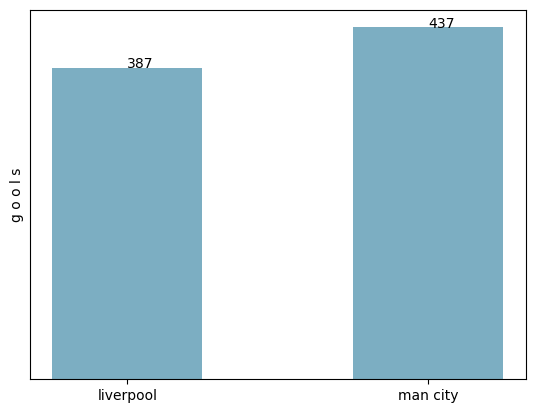

In [20]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

x=['liverpool','man city']
y=[387,437]
addlabels(x,y)
plt.bar(x,y,width=0.5,color='#7caec2')
plt.ylabel('g o o l s',fontdict={'fontsize':10})
plt.yticks([])
plt.show()

# task 2: Who has accumulated the most yellow cards in the league?  

In [22]:
hc=df.groupby('HomeTeam').sum('HomeTeamYellowCards').sort_values(by='HomeTeamYellowCards',ascending=False)['HomeTeamYellowCards'].to_frame('hc')

In [23]:
hc

,hc
HomeTeam,
Aston Villa,169.0
Wolves,166.0
Tottenham,166.0
Everton,161.0
Man United,159.0
Chelsea,158.0
Crystal Palace,156.0
Newcastle,155.0
Brighton,151.0


In [24]:
wc=df.groupby('AwayTeam',as_index=True,axis=0).sum('AwayTeamYellowCards').sort_values(by='AwayTeamYellowCards',ascending=False)['AwayTeamYellowCards'].to_frame('wc').copy()

In [25]:
most_resieved=wc.join(hc,on='AwayTeam').sum(axis=1).sort_values(ascending=False).to_frame('most_resieved')


# the answar is next:

In [26]:
most_resieved.iloc[0,:]

most_resieved    364.0
Name: Aston Villa, dtype: float64

# task 3: counting the total games results for chelsea

,Season,Date,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,HalfTimeHomeTeamGoals,HalfTimeAwayTeamGoals,HalfTimeResult,Referee,HomeTeamShots,AwayTeamShots,HomeTeamShotsOnTarget,AwayTeamShotsOnTarget,HomeTeamCorners,AwayTeamCorners,HomeTeamFouls,AwayTeamFouls,HomeTeamYellowCards,AwayTeamYellowCards,HomeTeamRedCards,AwayTeamReadCards,B365HomeTeam,B365Draw,B365AwayTeam,B365Over2.5Goals,B365Under2.5Goals,MarketMaxHomeTeam,MarketMaxDraw,MarketMaxAwayTeam,MarketAvgHomeTeam,MarketAvgDraw,MarketAvgAwayTeam,MarketMaxOver2.5Goals,MarketMaxUnder2.5Goals,MarketAvgOver2.5Goals,MarketAvgUnder2.5Goals
0,2019-2020,09/08/19,20:00:00,Liverpool,Norwich,4,1,H,4.0,0.0,H,M Oliver,15.0,12.0,7.0,5.0,11.0,2.0,9.0,9.0,0.0,2.0,0.0,0.0,1.14,10.00,19.00,1.40,3.00,1.16,10.00,23.00,1.14,8.75,19.83,1.45,3.11,1.41,2.92
1,2019-2020,10/08/19,12:30:00,West Ham,Man City,0,5,A,0.0,1.0,A,M Dean,5.0,14.0,3.0,9.0,1.0,1.0,6.0,13.0,2.0,2.0,0.0,0.0,12.00,6.50,1.22,1.44,2.75,13.00,6.75,1.29,11.84,6.28,1.25,1.51,2.77,1.48,2.65
2,2019-2020,10/08/19,15:00:00,Bournemouth,Sheffield United,1,1,D,0.0,0.0,D,K Friend,13.0,8.0,3.0,3.0,3.0,4.0,10.0,19.0,2.0,1.0,0.0,0.0,1.95,3.60,3.60,1.90,1.90,2.06,3.65,4.00,2.01,3.53,3.83,2.00,1.99,1.90,1.93
3,2019-2020,10/08/19,15:00:00,Burnley,Southampton,3,0,H,0.0,0.0,D,G Scott,10.0,11.0,4.0,3.0,2.0,7.0,6.0,12.0,0.0,0.0,0.0,0.0,2.62,3.20,2.75,2.10,1.72,2.80,3.33,2.85,2.68,3.22,2.78,2.20,1.78,2.12,1.73
4,2019-2020,10/08/19,15:00:00,Crystal Palace,Everton,0,0,D,0.0,0.0,D,J Moss,6.0,10.0,2.0,3.0,6.0,2.0,16.0,14.0,2.0,1.0,0.0,1.0,3.00,3.25,2.37,2.20,1.66,3.21,3.40,2.52,3.13,3.27,2.40,2.25,1.74,2.18,1.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,2023-2024,13/03/24,19:30:00,Bournemouth,Luton,4,3,H,0.0,3.0,A,S Allison,24.0,8.0,10.0,4.0,11.0,3.0,16.0,11.0,1.0,2.0,0.0,0.0,1.50,4.75,5.75,1.44,2.70,1.55,4.98,6.40,1.50,4.77,6.00,1.49,2.82,1.47,2.71
1798,2023-2024,16/03/24,15:00:00,Burnley,Brentford,2,1,H,1.0,0.0,H,D Bond,17.0,9.0,6.0,5.0,5.0,4.0,14.0,17.0,2.0,4.0,0.0,1.0,3.25,3.60,2.15,1.75,2.05,3.41,3.80,2.21,3.27,3.66,2.16,1.80,2.17,1.75,2.10
1799,2023-2024,16/03/24,15:00:00,Luton,Nott'm Forest,1,1,D,0.0,1.0,A,D England,10.0,16.0,4.0,6.0,6.0,7.0,10.0,17.0,1.0,2.0,0.0,0.0,2.80,3.50,2.45,1.67,2.15,2.95,3.80,2.47,2.81,3.63,2.42,1.73,2.31,1.68,2.22
1800,2023-2024,16/03/24,17:30:00,Fulham,Tottenham,3,0,H,1.0,0.0,H,R Jones,16.0,14.0,7.0,5.0,4.0,5.0,9.0,10.0,2.0,3.0,0.0,0.0,3.50,3.80,1.95,1.48,2.60,3.54,4.16,2.08,3.40,3.93,2.01,1.52,2.72,1.49,2.62


In [65]:
Chelsea_results=df[(df['HomeTeam']=='Chelsea') & (df['Season']=='2023-2024') | (df['AwayTeam']=='Chelsea') & (df['Season']=='2023-2024')][['HomeTeam','FullTimeResult']].groupby('FullTimeResult',as_index=False).count()

In [66]:
Chelsea_results.rename(columns={'HomeTeam':'total_results'},inplace=True)

In [86]:
Chelsea_results['game_resul']=Chelsea_results['FullTimeResult'].apply(lambda x: 'win' if x =='H' else 'drew' if x=='D' else 'lose' if x=='A' else False)

In [89]:
Chelsea_results.drop(columns={'FullTimeResult'},inplace=True)

In [123]:
Chelsea_results

,total_results,game_resul
0,9,lose
1,6,drew
2,12,win


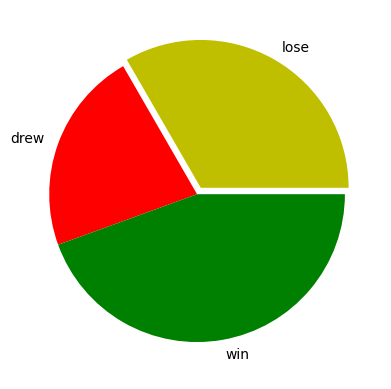

In [122]:

plt.pie(x=Chelsea_results.iloc[:,0],labels=Chelsea_results.iloc[:,1],explode=(0.05,0,0),colors={'g','y','r'})
plt.show()